## 编程实现对率回归
## Use python code to realize Logistic regression

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### 西瓜数据集3.0$\alpha$
### import data from csv file

In [7]:
data = pd.read_csv('data.csv')

In [8]:
dataset = np.array(data)

#### 前两列为自变量，最后一列为因变量
#### seperate data into different attributes

In [9]:
x = dataset[:, :-1]
y = dataset[:, -1]

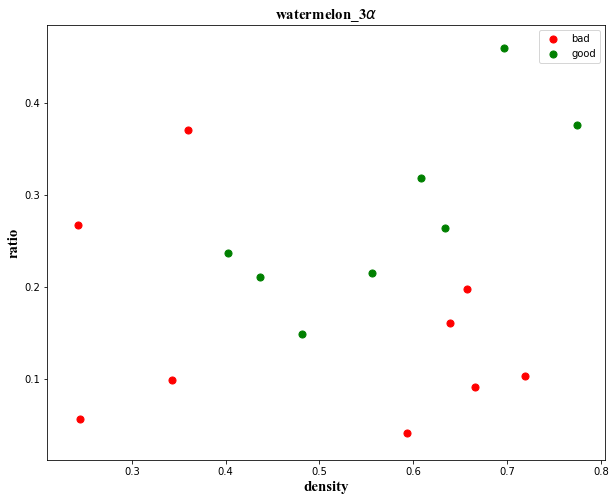

In [10]:
#### plot data ####
fgsize = 10,8
figure, fg = plt.subplots(figsize = fgsize)
font1 = {'family' : 'Times New Roman','weight' : 'normal','size'   : 15}
plt.title('watermelon_3' + r'$\alpha$', font1)
plt.xlabel('density', font1)
plt.ylabel('ratio', font1)

plt.scatter(x[y == 0, 0], x[y == 0, 1], s = 50, c = 'r', label = 'bad')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s = 50, c = 'g', label = 'good')
plt.legend(loc = 'upper right')

#### Sigmoid function:
### $$y=\frac{1}{1+e^{-(\omega^Tx+b)}}$$
#### minimize:
### $$\mathscr{l}(\beta)=\sum_{i = 1}^{m}\big(-y_i\beta^T\hat{x_i}+ln(1+e^{\beta^T\hat{x_I}})\big)$$

### 考虑用梯度下降法求解上式最小值时对应的参数
### Using follow fomula to calculate the gradient of equation above
### $$\frac{\partial\mathscr{l}(\beta)}{\partial\beta}=-\sum_{i=1}^{m}\hat{x_i}\big(y_i-p_1(\hat{x_i};\beta)\big)$$
### according to the Taylor expansion （appendix eq. B.16-B.17）
### $$f(x+\Delta x)\simeq f(x)+\Delta x^T\triangledown f(x)$$
### $$\Delta x = -\gamma \triangledown f(x)$$ where $\gamma$ is a small constant. We need to use eq. B.16 to calculate the gradient $\triangledown f(\beta)$, then use eq. B.17 to calculate new value of $\Delta \beta$.

In [11]:
### define likelihood function ###
def likelihood_fun(X, Y, Beta):
    '''
    X: sample variables vector in eq.3.27
    y: sample label in eq.3.27
    beta: parameter vector in eq.3.27 
    '''
    
    sum = 0
    
    for i in range(np.shape(X)[0]):
        sum += -Y[i]*np.dot(Beta.T, X[i]) + np.log(1 + np.exp(np.dot(Beta.T, X[i])))
    
    return sum

### 定步长梯度下降法（constan step gradient descent method)

In [12]:
def gradDescent_const(X, Y):
    '''
    return: the best parameter estimate of eq.3.27
    '''
    
    h = 0.1 #step length of iteration
    iteration = 500
    n = np.shape(X)[1]
    w = []
    b = []
    
    ### initialization ###
    Beta = np.zeros(n)
    delta_Beta = np.ones(n)*h
    llh = 0
    llh_temp = 0
    
    for i in range(iteration):
        Beta_temp = Beta.copy()
        
        # partial derivative #
        for j in range(n):
            Beta[j] += delta_Beta[j]
            llh_temp = likelihood_fun(X, Y, Beta)
            delta_Beta[j] = - h * (llh_temp - llh) / delta_Beta[j]
            Beta[j] = Beta_temp[j]
            
        Beta += delta_Beta
        w.append(Beta[0])
        b.append(Beta[1])
        llh = likelihood_fun(X, Y, Beta)
        
    return Beta, w, b

In [13]:
gradDescent_const(x, y)

(array([-2.07340802,  5.70091537]),
 [-11.783837033440925,
  -11.325151970467678,
  -10.867492403535966,
  -10.410064421814923,
  -9.952913995248723,
  -9.496097497033281,
  -9.039684693039057,
  -8.58376238672667,
  -8.128439143736138,
  -7.673851420064711,
  -7.220171504691113,
  -6.767617786727281,
  -6.316467960047225,
  -5.867075864530911,
  -5.41989269198266,
  -4.975493183228201,
  -4.534607090077647,
  -4.098155391888548,
  -3.6672893106475875,
  -3.2434278406339914,
  -2.828286254581545,
  -2.4238843100667067,
  -2.0325199860104277,
  -1.656694928970351,
  -1.2989842054932466,
  -0.961856685381461,
  -0.6474704101197117,
  -0.35748165961209394,
  -0.09290815605219033,
  0.14592703421787276,
  0.35936742463147575,
  0.5483284053073298,
  0.7141643398211022,
  0.8585256760491613,
  0.9832270849456992,
  1.0901384475949663,
  1.1811026534061622,
  1.2578789290702233,
  1.322107698000252,
  1.3752920976270842,
  1.4187915102791735,
  1.4538232062584915,
  1.4814690794110494,
  1.5

### 随机梯度下降法 (stochastic gradient descent method)
#### 核心思想：增量学习 (incremental learning), use a new sample to update regression coefficient

In [14]:
def gradDescent_stoc(X, Y):
    
    ### initialization ###
    m, n = np.shape(X)
    h = 0.5
    Beta = np.zeros(n)
    w = []
    b = []
    delta_Beta = np.ones(n) * h
    llh = 0
    llh_temp = 0
    
    for i in range(m):
        Beta_temp = Beta.copy() # for partial derivative
        
        for j in range(n):
            h = 0.5 * 1 / (1 + i + j) # update step length of iterator
            Beta[j] += delta_Beta[j]
            llh_temp = -Y[i]*np.dot(Beta.T, X[i]) + np.log(1 + np.exp(np.dot(Beta.T, X[i])))
            delta_Beta[j] = - h * (llh_temp - llh) / delta_Beta[j]
            Beta[j] = Beta_temp[j]
            
        Beta += delta_Beta
        w.append(Beta[0])
        b.append(Beta[1])
        llh = -Y[i]*np.dot(Beta.T, X[i]) + np.log(1 + np.exp(np.dot(Beta.T, X[i])))
    
    return Beta, w, b

In [15]:
const = gradDescent_const(x, y)

In [16]:
stoc = gradDescent_stoc(x, y)

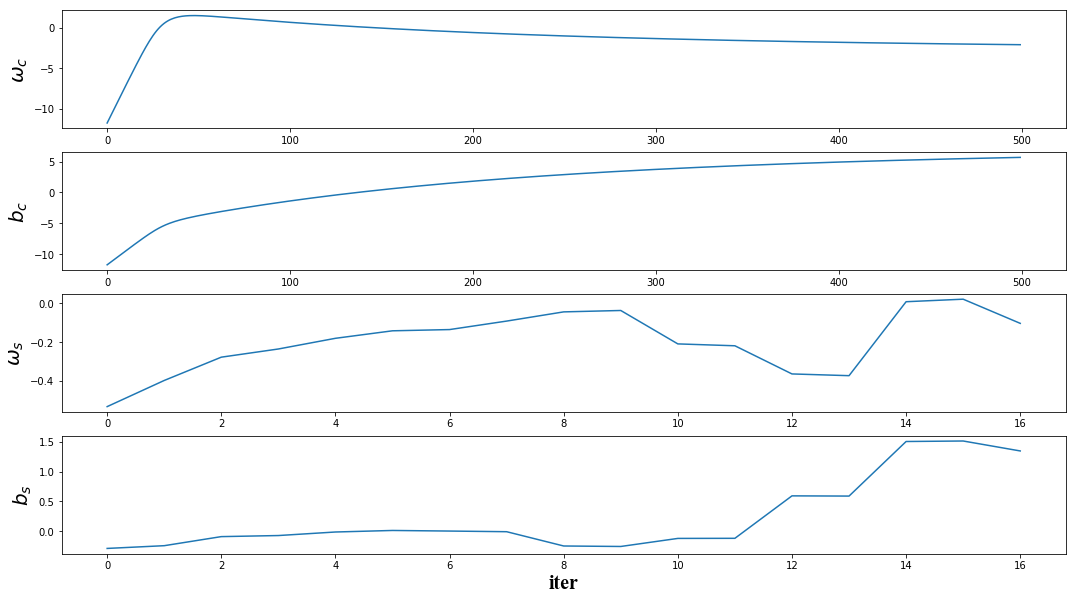

In [17]:
figure, axes = plt.subplots(4, 1, figsize = (18,10))

axes[0].set_ylabel(r'$\omega_c$', fontsize = 20)
axes[0].plot(const[1])
axes[1].set_ylabel(r'$b_c$', fontsize = 20)
axes[1].plot(const[-1])
axes[2].set_ylabel(r'$\omega_s$', fontsize = 20)
axes[2].plot(stoc[1])
font2 = {'family' : 'Times New Roman','weight' : 'normal','size'   : 20}
axes[3].set_xlabel('iter', font2)
axes[3].set_ylabel(r'$b_s$', fontsize = 20)
axes[3].plot(stoc[-1])

### 采用sklearn逻辑回归库函数直接拟合
### using sklearn lib for logistic regression

In [28]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [29]:
### generalization of test and train set ###
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y, test_size = 0.5, random_state =0)

### model training ###
Log_Reg = LogisticRegression()
Log_Reg.fit(X_train, Y_train)

### model testing ###
y_pre = Log_Reg.predict(X_test)

### summarize the accuracy of fitting
print(metrics.confusion_matrix(Y_test, y_pre))
print(metrics.classification_report(Y_test, y_pre))

[[3 2]
 [1 3]]
             precision    recall  f1-score   support

        0.0       0.75      0.60      0.67         5
        1.0       0.60      0.75      0.67         4

avg / total       0.68      0.67      0.67         9



# Newton Method

In [11]:
def Log_Reg_fun(X, y):
    '''
    Given training dataset, return optimal parameters of logistic regression by newton method.
    
    '''
    
    m, n = X.shape
    lr = 0.001
    # initialization #
    Beta = np.ones((1, n)) * 0.1
    
    z = X.dot(Beta.T)
    
    for i in range(150):
        p1 = np.exp(z) / (1 + np.exp(z))
        p = np.diag((p1 * (1 - p1)).reshape(m))
        first_order = -np.sum(X * (y - p1), 0, keepdims = True)
        
        # update #
        Beta -= first_order * lr
        z = X.dot(Beta.T)
        
    l = np.sum(y * z + np.log(1 + np.exp(z)))
    
    return Beta

In [27]:
Newton = Log_Reg_fun(x, y.reshape([-1, 1]))

In [28]:
px = np.array([0.1, 0.8])
py = px*Newton[0][0] + Newton[0][1]

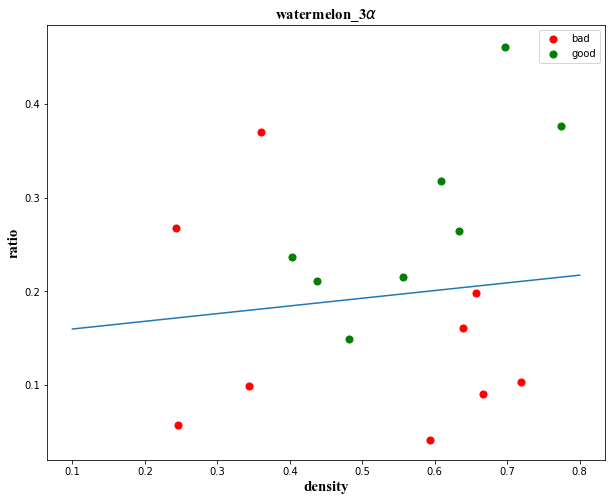

In [26]:
fgsize = 10,8
figure, fg = plt.subplots(figsize = fgsize)
font1 = {'family' : 'Times New Roman','weight' : 'normal','size'   : 15}
plt.title('watermelon_3' + r'$\alpha$', font1)
plt.xlabel('density', font1)
plt.ylabel('ratio', font1)
plt.plot(px,py)
plt.scatter(x[y == 0, 0], x[y == 0, 1], s = 50, c = 'r', label = 'bad')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s = 50, c = 'g', label = 'good')
plt.legend(loc = 'upper right')